## Random Forest

### Setup

In [1]:
from model import SKRandomForest, DuplicateSKRandomForest
from tune import (
    Categorical,
    Constant,
    Integer,
    outer_cv,
    SKBayesTuner,
)
from util import load_data

### Search Space

To tune the random forest we use maximum depth and maximum features.

The maximum features depends on the number of features in the data. Meanwhile, the maximum theoretical depth is as much as the number of observations, but in practice we do not need even close to that much. We also limit it to the number of features to make the optimization problem easier.

Furthermore, when applying duplication, we set `min_samples_split` to 3 to allow terminal nodes with both duplicates of an observation.

In [2]:
def space(duplicate: bool, hard_mode: bool):
    X, _ = load_data(duplicate=duplicate, hard_mode=hard_mode)
    _, n_feat = X.shape
    print(f"    Features: {n_feat}")

    return dict(
        # constants
        n_estimators=Constant(441),
        random_state=Constant(441),

        # variables
        criterion=Categorical(["gini", "log_loss"]), 
        max_features=Integer(low=1, high=n_feat, prior="log-uniform"),
        max_depth=Integer(low=1, high=n_feat, prior="log-uniform"),
        min_samples_split=Constant(3 if duplicate else 2),
    )

### Base

    Features: 74
1  Cached result loaded from ../models/random_forest_base/cv-1.mdl
1  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 38), ('max_features', 57), ('min_samples_split', 2), ('n_estimators', 441), ('random_state', 441)])
1  Accuracy: 0.9620853080568721
2  Cached result loaded from ../models/random_forest_base/cv-2.mdl
2  Best configuration: OrderedDict([('criterion', 'log_loss'), ('max_depth', 17), ('max_features', 52), ('min_samples_split', 2), ('n_estimators', 441), ('random_state', 441)])
2  Accuracy: 0.966824644549763
3  Cached result loaded from ../models/random_forest_base/cv-3.mdl
3  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 15), ('max_features', 73), ('min_samples_split', 2), ('n_estimators', 441), ('random_state', 441)])
3  Accuracy: 0.966824644549763
4  Cached result loaded from ../models/random_forest_base/cv-4.mdl
4  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 10), ('max_features', 74)

<Figure size 1000x1000 with 0 Axes>

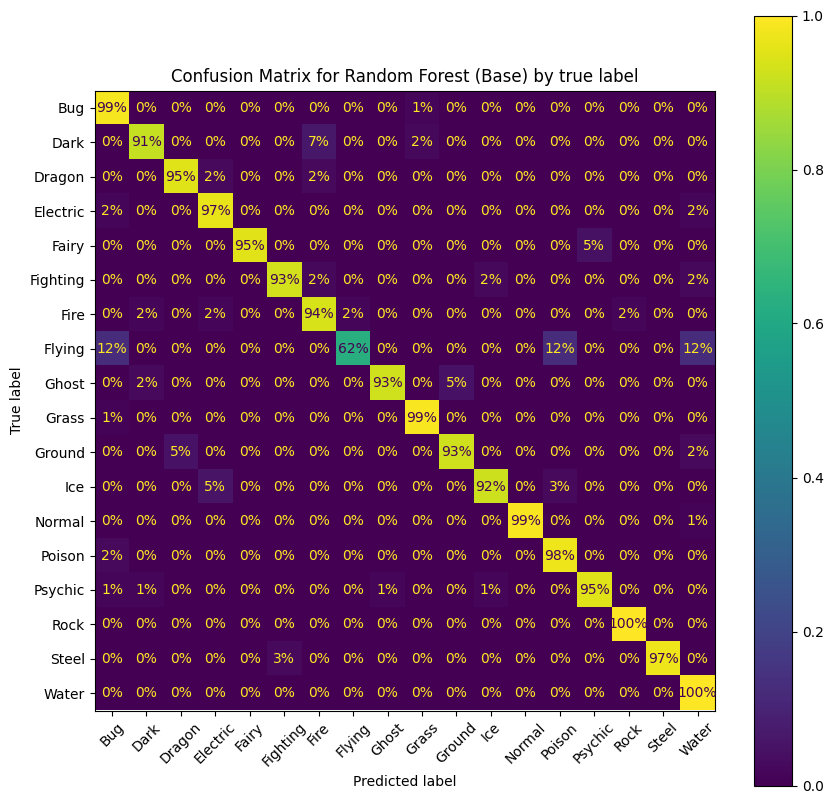

<Figure size 1000x1000 with 0 Axes>

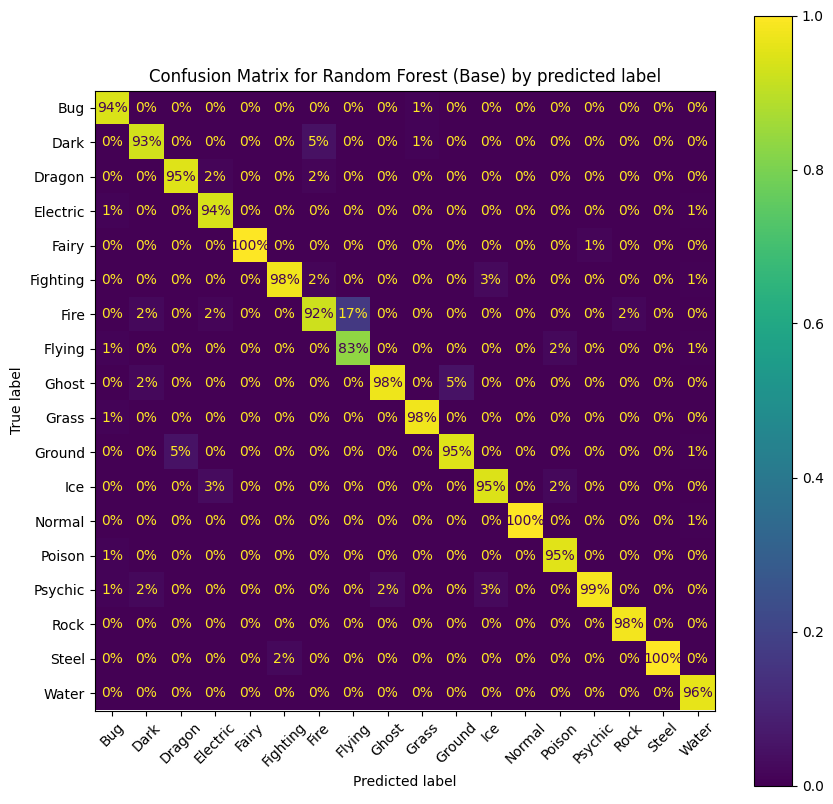

0.9649063416835929

In [3]:
outer_cv(
    tuner=SKBayesTuner(SKRandomForest()),
    search=space(duplicate=False, hard_mode=False),
    name="Random Forest",
    duplicate=False,
    hard_mode=False,
)

### Hard

    Features: 37
1  Cached result loaded from ../models/random_forest_hard/cv-1.mdl
1  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 19), ('max_features', 35), ('min_samples_split', 2), ('n_estimators', 441), ('random_state', 441)])
1  Accuracy: 0.41232227488151657
2  Cached result loaded from ../models/random_forest_hard/cv-2.mdl
2  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 37), ('max_features', 37), ('min_samples_split', 2), ('n_estimators', 441), ('random_state', 441)])
2  Accuracy: 0.5260663507109005
3  Cached result loaded from ../models/random_forest_hard/cv-3.mdl
3  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 13), ('max_features', 12), ('min_samples_split', 2), ('n_estimators', 441), ('random_state', 441)])
3  Accuracy: 0.41232227488151657
4  Cached result loaded from ../models/random_forest_hard/cv-4.mdl
4  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 20), ('max_features', 3),

<Figure size 1000x1000 with 0 Axes>

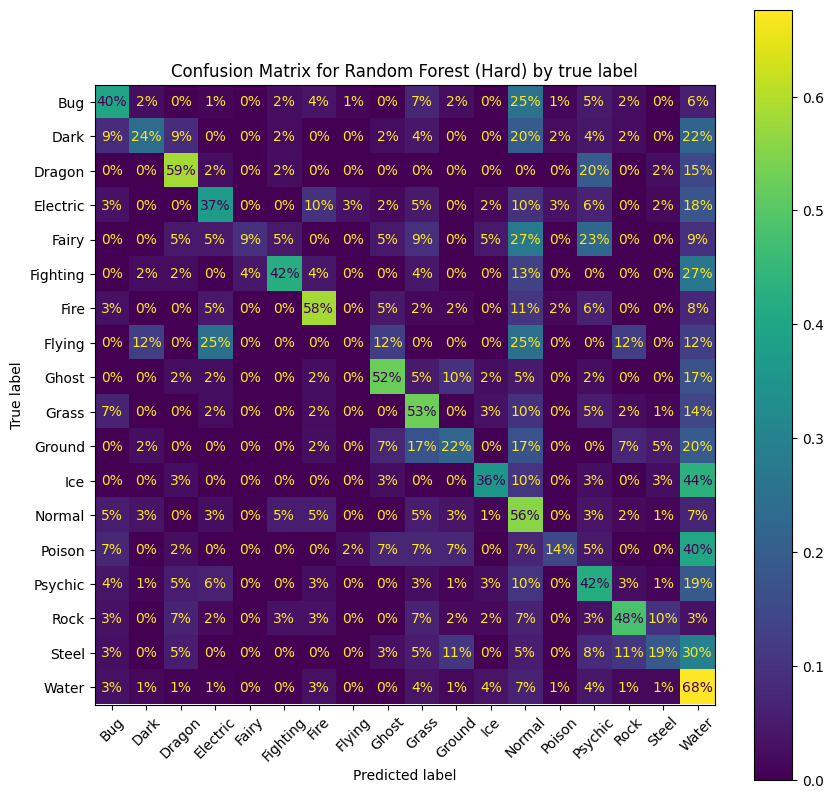

<Figure size 1000x1000 with 0 Axes>

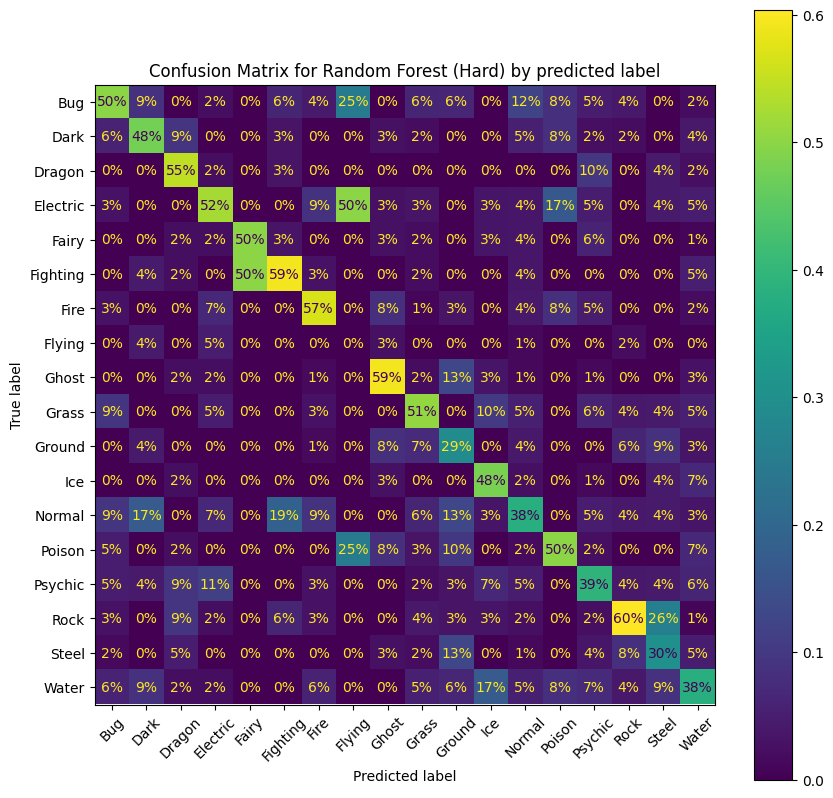

0.4497133829835252

In [4]:
outer_cv(
    tuner=SKBayesTuner(SKRandomForest()),
    search=space(duplicate=False, hard_mode=True),
    name="Random Forest",
    duplicate=False,
    hard_mode=True,
)

### Duplication

    Features: 55
1  Cached result loaded from ../models/random_forest_duplication/cv-1.mdl
1  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 13), ('max_features', 7), ('min_samples_split', 3), ('n_estimators', 441), ('random_state', 441)])
1  Accuracy: 0.990521327014218
2  Cached result loaded from ../models/random_forest_duplication/cv-2.mdl
2  Best configuration: OrderedDict([('criterion', 'log_loss'), ('max_depth', 24), ('max_features', 12), ('min_samples_split', 3), ('n_estimators', 441), ('random_state', 441)])
2  Accuracy: 0.9976303317535545
3  Cached result loaded from ../models/random_forest_duplication/cv-3.mdl
3  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 37), ('max_features', 6), ('min_samples_split', 3), ('n_estimators', 441), ('random_state', 441)])
3  Accuracy: 1.0
4  Cached result loaded from ../models/random_forest_duplication/cv-4.mdl
4  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 45), ('max_fe

<Figure size 1000x1000 with 0 Axes>

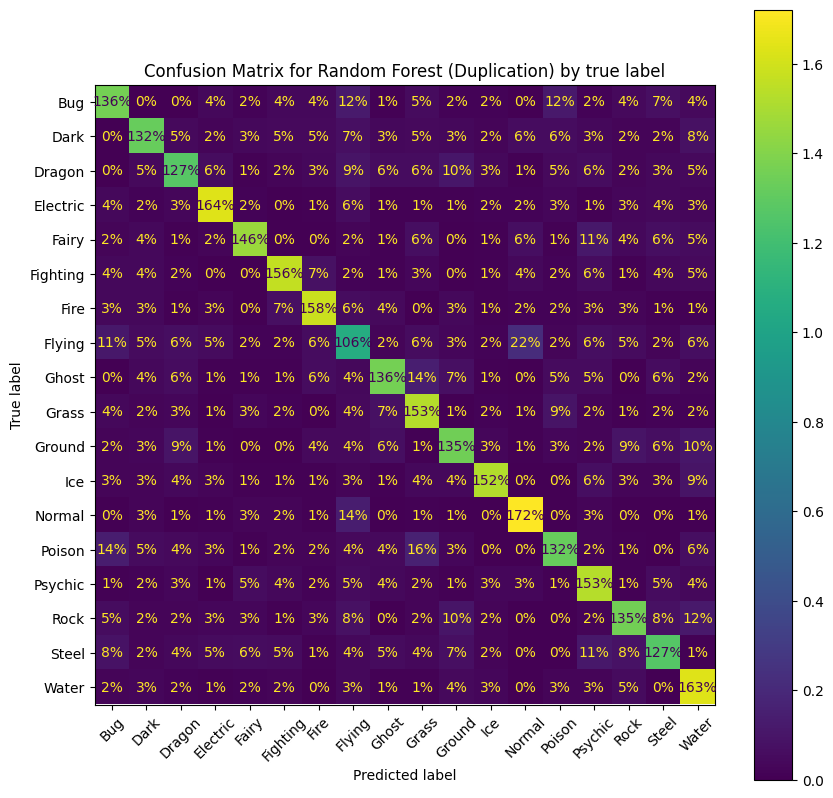

<Figure size 1000x1000 with 0 Axes>

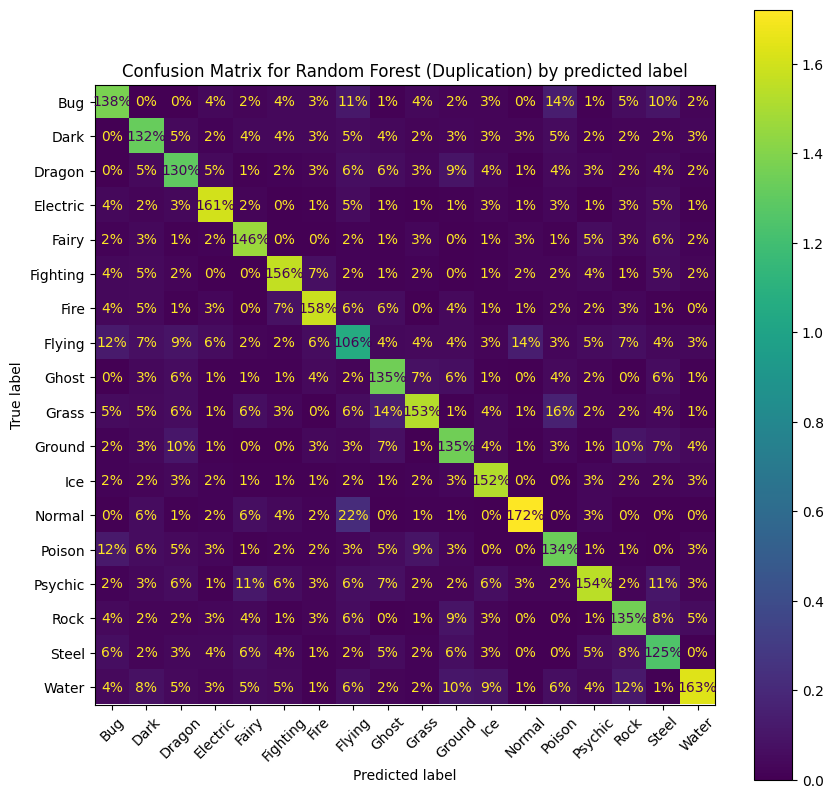

0.9976303317535546

In [5]:
outer_cv(
    tuner=SKBayesTuner(DuplicateSKRandomForest()),
    search=space(duplicate=True, hard_mode=False),
    name="Random Forest",
    duplicate=True,
    hard_mode=False,
)

### Duplication, Hard

    Features: 37
1  Cached result loaded from ../models/random_forest_duplication_hard/cv-1.mdl
1  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 28), ('max_features', 16), ('min_samples_split', 3), ('n_estimators', 441), ('random_state', 441)])
1  Accuracy: 0.4431279620853081
2  Cached result loaded from ../models/random_forest_duplication_hard/cv-2.mdl
2  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 37), ('max_features', 15), ('min_samples_split', 3), ('n_estimators', 441), ('random_state', 441)])
2  Accuracy: 0.3909952606635071
3  Cached result loaded from ../models/random_forest_duplication_hard/cv-3.mdl
3  Best configuration: OrderedDict([('criterion', 'gini'), ('max_depth', 18), ('max_features', 16), ('min_samples_split', 3), ('n_estimators', 441), ('random_state', 441)])
3  Accuracy: 0.3933649289099526
4  Cached result loaded from ../models/random_forest_duplication_hard/cv-4.mdl
4  Best configuration: OrderedDict([('criterion', 'g

<Figure size 1000x1000 with 0 Axes>

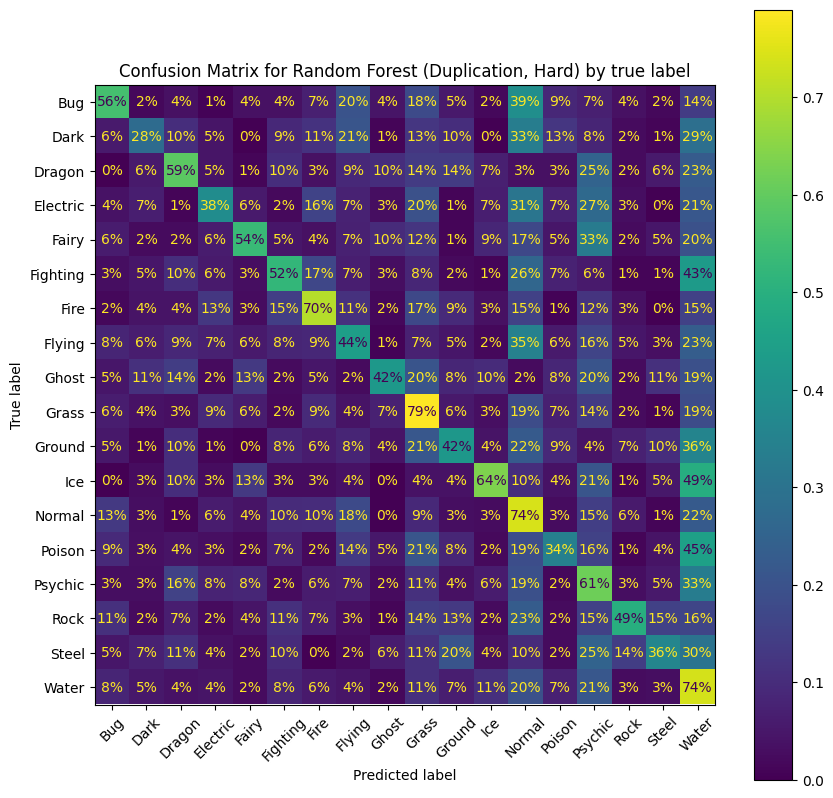

<Figure size 1000x1000 with 0 Axes>

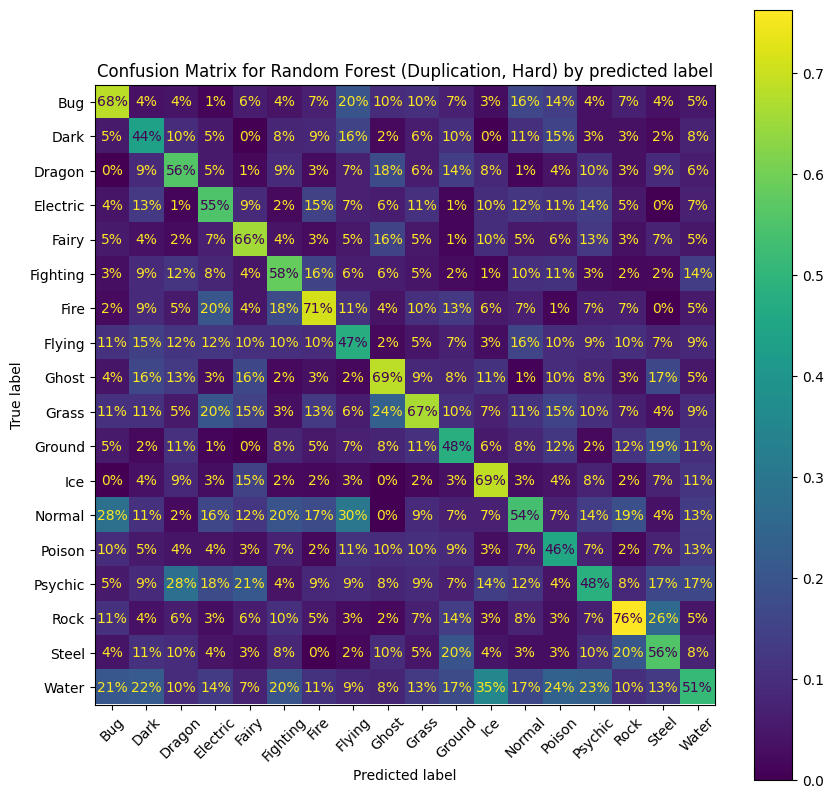

0.3994470774091627

In [6]:
outer_cv(
    tuner=SKBayesTuner(DuplicateSKRandomForest()),
    search=space(duplicate=True, hard_mode=True),
    name="Random Forest",
    duplicate=True,
    hard_mode=True,
)